# Regression Practice 2: Regularziation and Feature Selection



목표: Regularization 실습, Cross Validation 실습,

In [56]:
# Package
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Sklearn Toy Data
from sklearn.datasets import load_diabetes

## Data Load

당뇨병 데이터: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [57]:
# Data Loading (당뇨병)
data = load_diabetes()

In [58]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [59]:
print(f"X Shape: {data['data'].shape}")
print(f"Y Shape: {data['target'].shape}")

X Shape: (442, 10)
Y Shape: (442,)


In [60]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [61]:
pd.DataFrame(data['data'], columns=data['feature_names']).describe()
#pd.DataFrame(data['data'], columns=data['feature_names']).describe().applymap(lambda x: f"{x:0.2f}")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


데이터 값이?

In [62]:
data = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')

In [63]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [65]:
data['SEX']

0      2
1      1
2      2
3      1
4      1
      ..
437    2
438    2
439    2
440    1
441    1
Name: SEX, Length: 442, dtype: int64

In [66]:
data.groupby('SEX').mean()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
SEX,,,,,,,,,,
1,46.382979,26.010638,91.521957,187.995745,111.372340,54.385106,3.668468,4.567993,89.017021,149.021277
2,50.942029,26.790338,98.194783,190.439614,120.056039,44.570048,4.526377,4.724760,93.806763,155.666667


**주의**

- 사용하고자 하는 라이브러리가 혹은 함수가 ``categorical`` 변수에 대응해서 자동으로 처리를 해주나?
- 그렇지 않을 경우 데이터 matrix X를 미리 encoding!
- Dummy Encoding v.s. One-Hot Encoding  

In [67]:
# X's & Y Split
X = data.drop(columns=['Y']) 
print(X.head(5))
X = pd.get_dummies(X, columns=['SEX'], drop_first=False) # drop_first = False (default): One-Hot Encoding
print(X.head(5))
y = data['Y']
X = data.drop(columns=['Y']) 
X = pd.get_dummies(X, columns=['SEX'], drop_first=True) # drop_first=True : Dummy encoding
print(X.head(5))

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80
   AGE   BMI     BP   S1     S2    S3   S4      S5  S6  SEX_1  SEX_2
0   59  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  False   True
1   48  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   True  False
2   72  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  False   True
3   24  25.3   84.0  198  131.4  40.0  5.0  4.8903  89   True  False
4   50  23.0  101.0  192  125.4  52.0  4.0  4.2905  80   True  False
   AGE   BMI     BP   S1     S2    S3   S4      S5  S6  SEX_2
0   59  32.1  101.0  157   93.2  38.0  4.0  4.8598  87   True
1   48  21.6   87.0  183  103.2  70.0  3.0  3.8918  69  False
2   72  30.5   93.0  156   93.6  41.0  4

In [68]:
X = X.astype(float)
X # True/False -> number

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,SEX_2
0,59.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,1.0
1,48.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,0.0
2,72.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,1.0
3,24.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,0.0
4,50.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,1.0
438,47.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,1.0
439,60.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,1.0
440,36.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,0.0


## Train/Test Split

In [69]:
idx = list(range(X.shape[0]))
train_idx, test_idx = train_test_split(idx, test_size=0.3, random_state=0)
print(f"# of Train data : {len(train_idx)}")
print(f"# of Test data : {len(test_idx)}")

# of Train data : 309
# of Test data : 133


# Run regression methods

여러 Regression 방법론 적용 -> Best model 찾기
Measure: root mean squared error (RMSE)

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

## Linear Regressoin (Scale-invariant)

In [70]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
est = sm.OLS(y.iloc[train_idx], Xc.iloc[train_idx])
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     37.01
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           1.21e-46
Time:                        16:30:10   Log-Likelihood:                -1665.0
No. Observations:                 309   AIC:                             3352.
Df Residuals:                     298   BIC:                             3393.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -310.0376     78.982     -3.925      0.0

In [71]:
from sklearn.preprocessing import StandardScaler
# Standardization?
# Initialize a scaler
scaler = StandardScaler()
print(X.head(4))
# Fit and transform the data
X_scaled = X.copy()
X_scaled['BMI'] = scaler.fit_transform(np.array(X['BMI']).reshape(-1, 1))
X_scaled['AGE'] = scaler.fit_transform(np.array(X['AGE']).reshape(-1, 1))
print(X_scaled.head(4))

    AGE   BMI     BP     S1     S2    S3   S4      S5    S6  SEX_2
0  59.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0    1.0
1  48.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0    0.0
2  72.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0    1.0
3  24.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0    0.0
        AGE       BMI     BP     S1     S2    S3   S4      S5    S6  SEX_2
0  0.800500  1.297088  101.0  157.0   93.2  38.0  4.0  4.8598  87.0    1.0
1 -0.039567 -1.082180   87.0  183.0  103.2  70.0  3.0  3.8918  69.0    0.0
2  1.793307  0.934533   93.0  156.0   93.6  41.0  4.0  4.6728  85.0    1.0
3 -1.872441 -0.243771   84.0  198.0  131.4  40.0  5.0  4.8903  89.0    0.0


In [72]:
Xc_scaled = sm.add_constant(X_scaled)
est = sm.OLS(y.iloc[train_idx], Xc_scaled.iloc[train_idx])
est2_scale = est.fit()
print(est2_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     37.01
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           1.21e-46
Time:                        16:30:11   Log-Likelihood:                -1665.0
No. Observations:                 309   AIC:                             3352.
Df Residuals:                     298   BIC:                             3393.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -154.5457     82.566     -1.872      0.0

Scaling 을 하고 진행: $\hat{y}$ 값은 바뀌지 않음
예: 
- $\hat{y} = \hat{\beta}_0+ 4x$ 값이 기존 값이고 scaling 해서 $x_{scaled}=x/60$ 이라면, $\hat{y}_{scaled} = \hat{\beta}_{0,scaled}+ 4*60 x_{scaled} = \hat{y}$.
- $\hat{\beta}=4$ 에서 $\hat{\beta}_{scaled}=4*60$.
- Test statistic & p-value 또한 바뀌지 않음 

In [73]:
print(est2.predict(Xc.iloc[train_idx])[0], est2_scale.predict(Xc_scaled.iloc[train_idx])[0])

214.2322331772582 214.2322331772582


In [74]:
print(pd.concat([est2.pvalues, est2_scale.pvalues], axis = 1))

                  0             1
const  1.075834e-04  6.221716e-02
AGE    4.621581e-01  4.621581e-01
BMI    3.092222e-12  3.092222e-12
BP     8.945265e-04  8.945265e-04
S1     2.998758e-01  2.998758e-01
S2     5.346451e-01  5.346451e-01
S3     7.836541e-01  7.836541e-01
S4     6.540131e-01  6.540131e-01
S5     2.937173e-04  2.937173e-04
S6     7.251819e-01  7.251819e-01
SEX_2  7.599209e-03  7.599209e-03


데이터 셋 고정 (raw 데이터로부터 train/test 만 분리된 데이터)

In [75]:
X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

In [76]:
from sklearn.pipeline import Pipeline
LinReg = Pipeline(steps=[
    ('Standardize', StandardScaler()),
    ('LinReg', LinearRegression())
])

In [77]:
LinOut = LinReg.fit(X_train, y_train)
print(f"Train RMSE (Linear Regression): {np.sqrt(np.mean((LinOut.predict(X_train) - y_train)**2))}")
print(f"Test RMSE (Linear Regression): {np.sqrt(np.mean((LinOut.predict(X_test) - y_test)**2))}")

Train RMSE (Linear Regression): 52.95416471860245
Test RMSE (Linear Regression): 55.651766938926656


In [78]:
results = pd.DataFrame()
results['Linear'] = [np.sqrt(np.mean((LinOut.predict(X_train) - y_train)**2)), np.sqrt(np.mean((LinOut.predict(X_test) - y_test)**2))]
results.index = ['Train RMSE', 'Test RMSE']
results

,Linear
Train RMSE,52.954165
Test RMSE,55.651767


## Polynomial Regression

Here, we need to figure out the degree of polynomial.

### K-fold CV

- Polynomial의 degree를 찾는 과정 자체를 Polynomial regression 방법론에 포함된 것으로 볼 수 있다
- Degree를 찾는 과정은 training data 로만 진행해야 한다
- k-fold CV 작업시 training 데이터를 쪼개서 진행

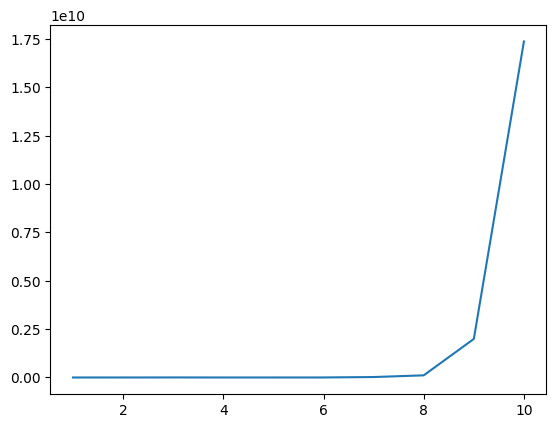

In [79]:
K = 5

kf = KFold(n_splits=K, shuffle = True, random_state = 0)

kfold_cv = []
for degree in range(10):
    d = degree + 1
    test_mse = []
    for train_idx, test_idx in kf.split(X_train, y_train):
        x_train_cv, x_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx] 
        y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx] 
        poly_d = Pipeline(steps=[
            ('Standardize', StandardScaler()),
            ('poly_d-feature', PolynomialFeatures(degree=d, include_bias=False)),
            ('LinReg', LinearRegression())
        ])
        poly_out_d = poly_d.fit(x_train_cv,y_train_cv)
        test_mse.append(((poly_out_d.predict(x_test_cv) - y_test_cv)**2).mean())
    kfold_cv.append(np.mean(test_mse))
plt.plot(np.arange(10)+1, kfold_cv)

In [80]:
print(f"The best degree of the polynomial is {np.argmin(kfold_cv)+1}")
np.sqrt(kfold_cv)

The best degree of the polynomial is 1


array([5.55086086e+01, 6.72804695e+01, 1.43114733e+03, 2.61159641e+02,
       5.30047516e+02, 8.92841924e+02, 4.75818769e+03, 1.05237123e+04,
       4.46467726e+04, 1.31816241e+05])

5-fold CV 기준 degree 1의 estimated test MSE 는 약 55.51. Linear regression 과 같아야 하는데 다른 이유는?

In [81]:
d = 1
poly_d = Pipeline(steps=[
            ('Standardize', StandardScaler()),
            ('poly_d-feature', PolynomialFeatures(degree=d, include_bias=False)),
            ('LinReg', LinearRegression())
        ])
poly_out_d = poly_d.fit(X_train,y_train)

results['Poly'] = [np.sqrt(np.mean((poly_out_d.predict(X_train)- y_train)**2)), np.sqrt(np.mean((poly_out_d.predict(X_test)- y_test)**2))]
results

,Linear,Poly
Train RMSE,52.954165,52.954165
Test RMSE,55.651767,55.651767


## Ridge Regression

penalty parameter: alpha (need to tune)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [82]:
RidgeOut = Ridge(alpha=0).fit(X_train, y_train)
np.sqrt(np.mean((RidgeOut.predict(X_test)-y_test)**2))

55.65176693892668

Let's tune the parameter. Instead of KFold directly, let's use GridSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [83]:
# logspace v.s. linspace
print(np.logspace(-5,2, num=10).round(5))
print(np.linspace(10**(-5),10**2,num=10).round(5))

[1.000000e-05 6.000000e-05 3.600000e-04 2.150000e-03 1.292000e-02
 7.743000e-02 4.641600e-01 2.782560e+00 1.668101e+01 1.000000e+02]
[1.000000e-05 1.111112e+01 2.222223e+01 3.333334e+01 4.444445e+01
 5.555556e+01 6.666667e+01 7.777778e+01 8.888889e+01 1.000000e+02]


Ridge, Lasso 등 $\lambda  \|\beta\|$ 형태의 tuning parameter 의 경우, log-scale 로 grid search 해야 더 적절한 값을 찾을 수 있음

**주의**
- Pipeline 으로 했을 경우 paramater grid 를 설정할 시 parameter의 이름은 해당 모델의 이름__parameter 이름으로 해야 함
- CV에 사용할 performance measure를 명시해주어야 함

In [84]:
from sklearn.metrics import mean_squared_error, make_scorer
scoring_func = make_scorer(mean_squared_error)


RidgeReg = Pipeline(steps=[
    ('Standardize', StandardScaler()),
    ('Ridge_reg', Ridge())
])

# Grid Search
param_grid = {'Ridge_reg__alpha' : np.logspace(-6,2, num=20)} 
#RidgeCV = GridSearchCV(RidgeReg, param_grid, cv= 5, n_jobs = 5, scoring=scoring_func) 
RidgeCV = GridSearchCV(RidgeReg, param_grid, cv= 7, n_jobs = 20, scoring='neg_mean_squared_error') 
RidgeCV.fit(X_train,y_train)

,estimator,"Pipeline(step...g', Ridge())])"
,param_grid,{'Ridge_reg__alpha': array([1.0000...00000000e+02])}
,scoring,'neg_mean_squared_error'
,n_jobs,20
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [85]:
RidgeCV.best_params_

{'Ridge_reg__alpha': 14.384498882876601}

In [86]:
# 최적의 모델 가져오기
best_model = RidgeCV.best_estimator_

# Ridge 회귀 모델 추출
ridge_model = best_model.named_steps['Ridge_reg']

# 회귀 계수(beta 값) 출력
beta_values = ridge_model.coef_


df = pd.DataFrame(index=X.columns)
df['beta_linear'] =  LinReg.named_steps['LinReg'].coef_
df['beta_ridge'] = beta_values
df


,beta_linear,beta_ridge
AGE,-2.533822,-2.153978
BMI,27.983348,27.142442
BP,12.987847,12.680800
S1,-23.909382,-4.826714
S2,11.498768,-3.632045
S3,-3.363826,-10.862855
S4,4.236229,3.306405
S5,35.441631,26.469936
S6,1.366779,2.014643
SEX_2,-9.214564,-8.694143


In [87]:
print("Test MSE (Ridge): ",np.sqrt(np.mean((RidgeCV.predict(X_test) - y_test)**2)))

results['Ridge'] = [np.sqrt(np.mean((RidgeCV.predict(X_train) - y_train)**2)), np.sqrt(np.mean((RidgeCV.predict(X_test) - y_test)**2))]
results

Test MSE (Ridge):  55.59567150355075


,Linear,Poly,Ridge
Train RMSE,52.954165,52.954165,53.053848
Test RMSE,55.651767,55.651767,55.595672


## Lasso

Ridge 와 마찬가지로 패널티 파라미터 조절 필요 (alpha)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [88]:
LassoReg = Pipeline(steps=[
    ('Standardize', StandardScaler()),
    ('Lasso_reg', Lasso())
])

# Grid Search
param_grid = {'Lasso_reg__alpha' : np.logspace(-6,2, num=20)} 
LassoCV = GridSearchCV(LassoReg, param_grid, cv= 7, n_jobs = 20, scoring='neg_mean_squared_error')
LassoCV.fit(X_train,y_train)

/home/jsong/anaconda3/envs/das/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e+02, tolerance: 1.687e+02
  model = cd_fast.enet_coordinate_descent(


,estimator,"Pipeline(step...g', Lasso())])"
,param_grid,{'Lasso_reg__alpha': array([1.0000...00000000e+02])}
,scoring,'neg_mean_squared_error'
,n_jobs,20
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [89]:
LassoCV.best_params_

{'Lasso_reg__alpha': 0.7847599703514606}

In [90]:
# 최적의 모델 가져오기
best_model = LassoCV.best_estimator_

# Ridge 회귀 모델 추출
Lasso_model = best_model.named_steps['Lasso_reg']

# 회귀 계수(beta 값) 출력
beta_values = Lasso_model.coef_
df['beta_lasso'] = beta_values
df

,beta_linear,beta_ridge,beta_lasso
AGE,-2.533822,-2.153978,-1.279312
BMI,27.983348,27.142442,27.953262
BP,12.987847,12.680800,11.793635
S1,-23.909382,-4.826714,-6.890200
S2,11.498768,-3.632045,-0.000000
S3,-3.363826,-10.862855,-11.067030
S4,4.236229,3.306405,0.000000
S5,35.441631,26.469936,29.145124
S6,1.366779,2.014643,0.564335
SEX_2,-9.214564,-8.694143,-7.777656


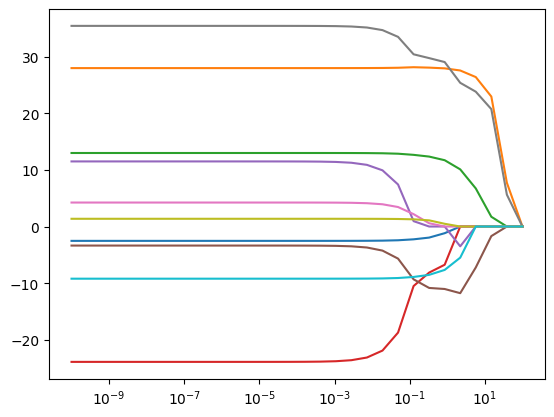

In [92]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Lasso Solution PATH
from sklearn.linear_model import lasso_path

n_grid = 30
alpha_grid = np.logspace(-10,2,n_grid) # from 10^(-10) to 10^2  - log-scale
LassoReg_plot = Pipeline(steps=[
    ('Standardize', StandardScaler()),
    ('Lasso_reg', Lasso())
])

coefs = []

for a in alpha_grid:
    LassoReg_plot.set_params(Lasso_reg__alpha = a)
    LassoReg_plot.fit(X_train, y_train)
    coefs.append(LassoReg_plot.named_steps['Lasso_reg'].coef_)
    
fig,ax = plt.subplots() 
ax.plot(alpha_grid, coefs) 
ax.set_xscale('log')
plt.show()

In [93]:
print("Test MSE (Lasso): ",np.sqrt(np.mean((LassoCV.predict(X_test) - y_test)**2)))
results['Lasso'] = [np.sqrt(np.mean((LassoCV.predict(X_train) - y_train)**2)), np.sqrt(np.mean((LassoCV.predict(X_test) - y_test)**2))]
results

Test MSE (Lasso):  55.848325812509025


,Linear,Poly,Ridge,Lasso
Train RMSE,52.954165,52.954165,53.053848,53.053897
Test RMSE,55.651767,55.651767,55.595672,55.848326
